In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams 

rcParams['figure.figsize'] = 12, 10
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

import torch 
from karateclub import Graph2Vec

#from rdkit import Chem
import networkx as nx

from torch_geometric.utils import to_networkx, from_networkx
import torch_geometric

Loading the dataset and convert to network

In [40]:
def graph2vec(nx_dataset):
    model = Graph2Vec()
    model.fit(nx_dataset)
    all_data_graph2vec = model.get_embedding()
    return all_data_graph2vec

In [2]:
all_data = torch.load('/beegfs/desy/user/kotobiam/GNN_training/' + 'networks_nexfas_db.pt')
gnn_dataset_nx = []
for data in all_data:
    gnn_dataset_nx.append(to_networkx(data))

In [6]:
all_data_graph2vec.shape

(140, 128)

In [14]:
to_networkx(all_data[0])

## clustering the graph embedding

In [2]:
import hdbscan

from sklearn.manifold import TSNE

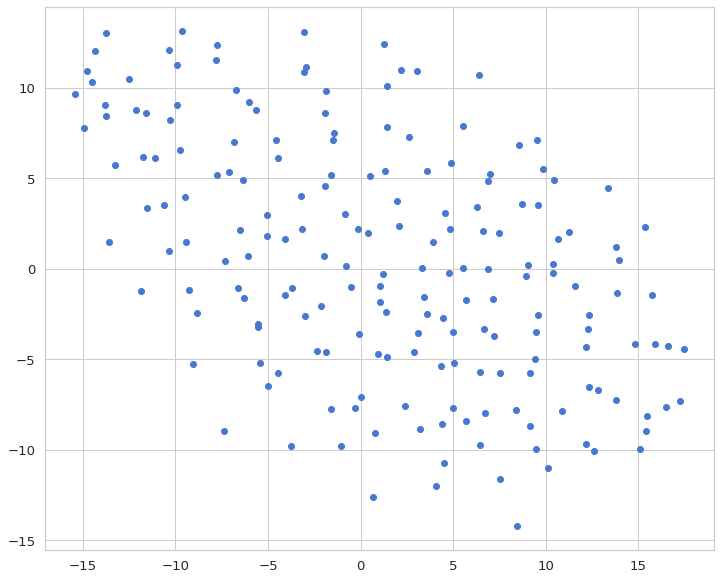

In [33]:
tsne_ldData = TSNE(n_components=2, perplexity=20).fit_transform(all_data_graph2vec)
plt.scatter(tsne_ldData[:, 0], tsne_ldData[:, 1])

In [38]:
min_cluster=2
min_samples=1

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, min_samples=min_samples, \
                            cluster_selection_epsilon=0.5).fit(all_data_graph2vec)

In [39]:
print(max(clusterer.labels_))

1


# Graph embeddings on prepared datasets

In [20]:
tu_dataset = torch_geometric.datasets.TUDataset(root='./', name="MUTAG")

In [42]:
cora_dataset = torch_geometric.datasets.Planetoid(root='./', name="Cora")

Processing...
Done!


In [47]:
len(cora_dataset)

1

In [44]:
cora_dataset_nx = []

for data in cora_dataset:
    cora_dataset_nx.append(to_networkx(data))

In [45]:
all_data_graph2vec = graph2vec(cora_dataset_nx)

In [46]:
all_data_graph2vec.shape

(1, 128)